In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
data = pd.read_csv('data/star_dataset.csv')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City           5235 non-null   object
 1   Business Name  5235 non-null   object
 2   Stars          5235 non-null   int64 
 3   TrueTimestamp  5235 non-null   object
dtypes: int64(1), object(3)
memory usage: 163.7+ KB


In [34]:
data.head(5)

,City,Business Name,Stars,TrueTimestamp
0,agadir,Attijariwafa Bank,2,2022-03-14 21:22:17.360486
1,agadir,Attijariwafa Bank,4,2023-03-14 21:22:17.360486
2,agadir,Attijariwafa Bank,5,2024-12-13 21:22:17.360486
3,agadir,Attijariwafa Bank,5,2012-03-16 21:22:17.360486
4,agadir,Attijariwafa Bank,1,2024-10-14 21:22:17.360486


In [35]:
data['Stars'].describe()

count    5235.000000
mean        2.584145
std         1.761890
min         1.000000
25%         1.000000
50%         1.000000
75%         5.000000
max         5.000000
Name: Stars, dtype: float64

C:\Users\bader\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


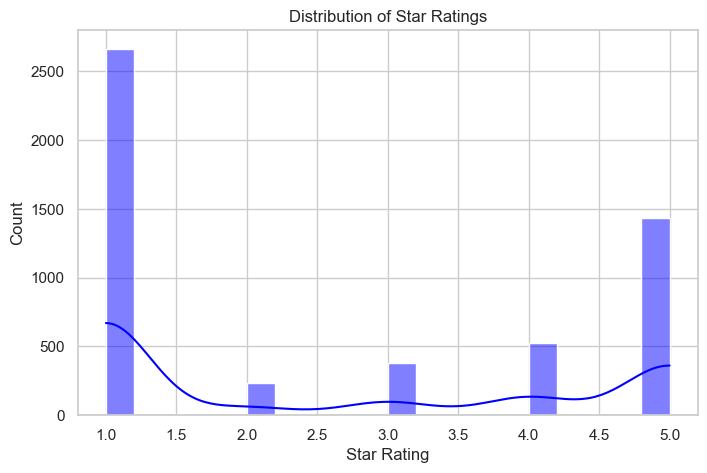

In [36]:
sns.set(style="whitegrid")

# Plot histogram of star ratings
plt.figure(figsize=(8,5))
sns.histplot(data["Stars"], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings")

# Show plot
plt.show()

THIS SHOWS US THAT MOROCCANS ARE NOT VERY HAPPY WITH MOROCCAN BANKS SERVICES IN GENERAL


-> lets check how rating evolve over time

C:\Users\bader\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bader\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


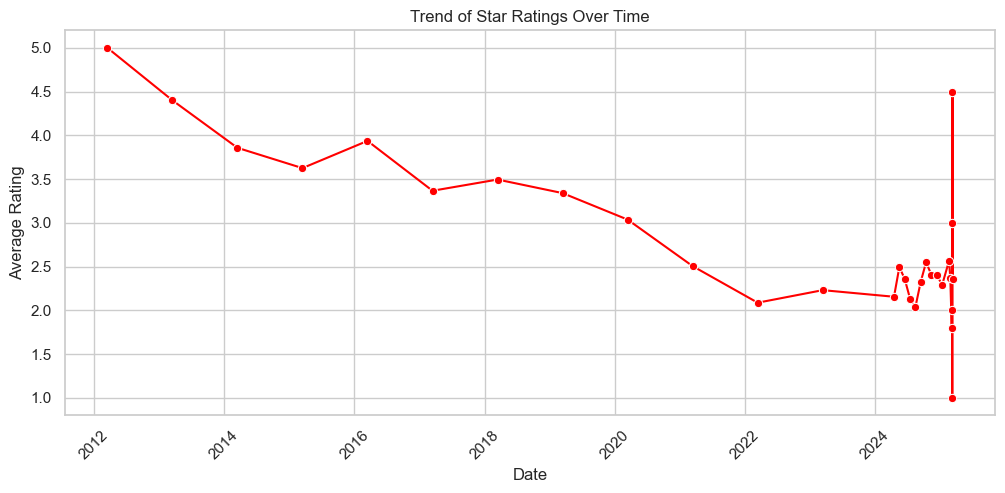

In [37]:
# Convert timestamp column to datetime format
data["TrueTimestamp"] = pd.to_datetime(data["TrueTimestamp"])

# Group by date and calculate average rating
data["Date"] = data["TrueTimestamp"].dt.date
rating_trend = data.groupby("Date")["Stars"].mean().reset_index()

# Plot the trend
plt.figure(figsize=(12,5))
sns.lineplot(data=rating_trend, x="Date", y="Stars", marker="o", color="red")

plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.title("Trend of Star Ratings Over Time")

plt.xticks(rotation=45)
plt.show()


these visuals are dont seem to be right , lets detect and outliers and fix it

In [38]:
bank_avg_ratings = data.groupby("Business Name")["Stars"].mean()

outliers = bank_avg_ratings[(bank_avg_ratings < 1.1) | (bank_avg_ratings > 4.9)]

print("Outlier Banks (dont have enough reviews so far ):")
print(outliers)


Outlier Banks (dont have enough reviews so far ):
Series([], Name: Stars, dtype: float64)


In [39]:
#removing them
# Remove reviews from extreme banks
df_filtered = data[~data["Business Name"].isin(outliers.index)]

# Save cleaned dataset
df_filtered.to_csv("data/star_dataset_no_outliers.csv", index=False)

print("Outliers removed. New dataset saved.")


Outliers removed. New dataset saved.


In [40]:
df = pd.read_csv("data/star_dataset_no_outliers.csv")

In [41]:
df['Stars'].describe()

count    5235.000000
mean        2.584145
std         1.761890
min         1.000000
25%         1.000000
50%         1.000000
75%         5.000000
max         5.000000
Name: Stars, dtype: float64

C:\Users\bader\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


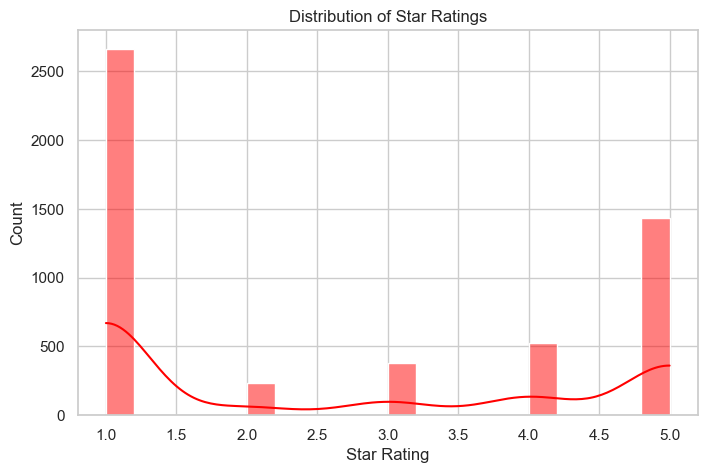

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df["Stars"], bins=20, kde=True, color="red")

# Labels and title
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings")

# Show plot
plt.show()

this indicates that people often leave reviews when too satisfied or not satisfied

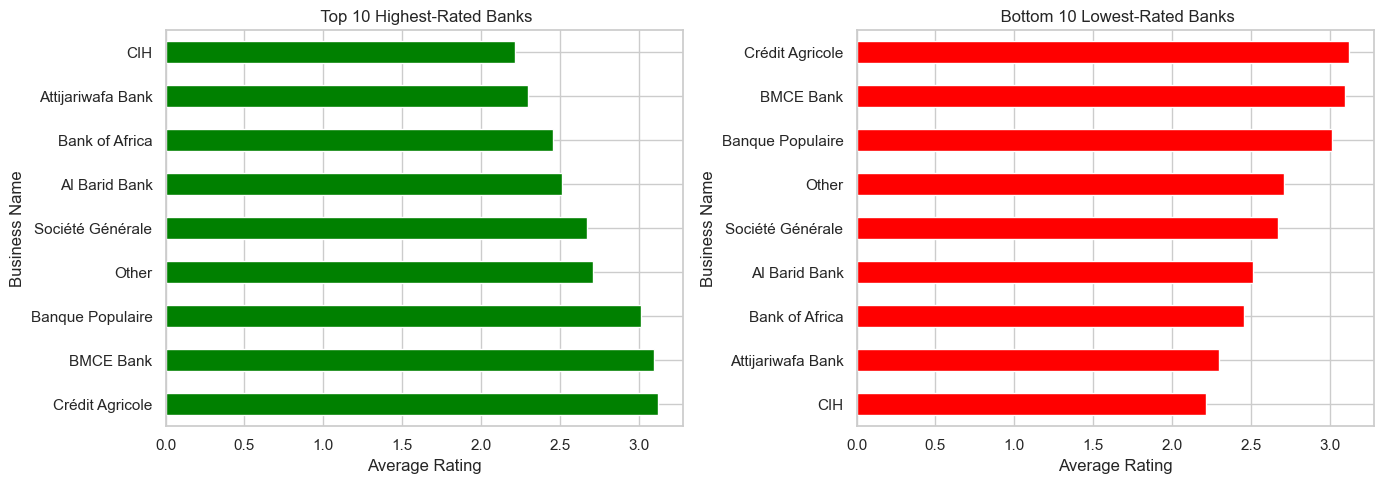

In [44]:
# Compute average ratings per bank
bank_ratings = df.groupby("Business Name")["Stars"].mean()

# Sort and select top & bottom 10
top_10 = bank_ratings.nlargest(10)
bottom_10 = bank_ratings.nsmallest(10)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

top_10.plot(kind="barh", ax=ax[0], color="green")
ax[0].set_title(" Top 10 Highest-Rated Banks")
ax[0].set_xlabel("Average Rating")

bottom_10.plot(kind="barh", ax=ax[1], color="red")
ax[1].set_title(" Bottom 10 Lowest-Rated Banks")
ax[1].set_xlabel("Average Rating")

plt.tight_layout()
plt.show()